In [2]:
.libPaths("/home/tbellagio/miniforge3/envs/r-environment/lib/R/library")

In [3]:
library(lfmm)
library(vcfR)

Warning message:
“package ‘lfmm’ was built under R version 4.3.2”

   *****       ***   vcfR   ***       *****
   This is vcfR 1.15.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****




In [24]:
library(OutFLANK)

Warning message:
“package ‘OutFLANK’ was built under R version 4.3.3”
Loading required package: qvalue

Warning message:
“package ‘qvalue’ was built under R version 4.3.2”


In [10]:
runid = '793549'

In [4]:
delta_p_file <- paste0("lfmm/allele_counts/all_alt_allele_counts_runid_", runid, ".csv")
allele_freq <- read.csv(delta_p_file, sep = ',', header = TRUE, check.names = FALSE)
colnames(allele_freq) <- NULL
allele_freq <- t(as.matrix(allele_freq))

In [5]:
dim(allele_freq)

[1]   17 5535

In [6]:
pc <- prcomp(allele_freq)

In [7]:
pc$sdev[1:20]

[1] 2.509758e+03 2.324137e+03 2.236841e+03 2.083626e+03 1.900950e+03
 [6] 1.879324e+03 1.645231e+03 1.636803e+03 1.534831e+03 1.322861e+03
[11] 1.290841e+03 1.209465e+03 1.174157e+03 1.053247e+03 1.002736e+03
[16] 9.235026e+02 1.665026e-12           NA           NA           NA

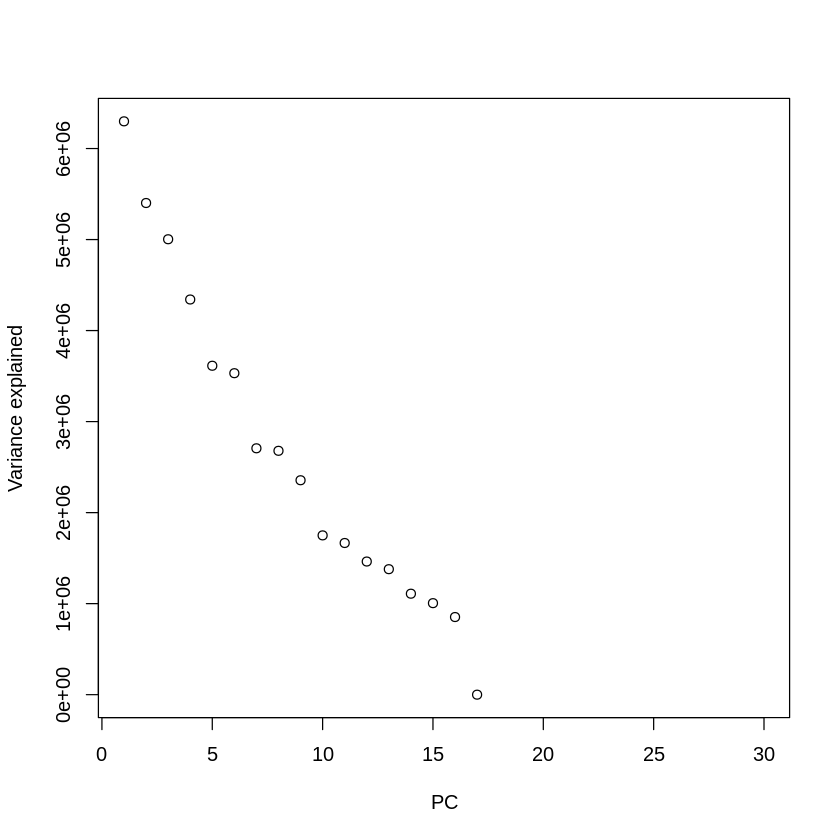

In [8]:
plot(pc$sdev[1:30]^2, xlab = 'PC', ylab = "Variance explained")
#points(6,pc$sdev[6]^2, type = "h", lwd = 3, col = "blue")

In [12]:
runid

[1] "793549"

In [15]:
vcf_full <- read.vcfR('results/vcfs/vcf_w_neutral_mutid_793549.vcf')

Scanning file to determine attributes.
File attributes:
  meta lines: 5
  header_line: 6
  variant count: 48772
  column count: 8509
Meta line 5 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 48772
  Character matrix gt cols: 8509
  skip: 0
  nrows: 48772
  row_num: 0
Processed variant: 48772
All variants processed


In [16]:
geno_full <- vcf_full@gt[,-1] 
dim(geno_full)
position_full <- getPOS(vcf_full)
rown <- vcf_full@fix[,"ALT"] # mutation ID

[1] 48772  8500

In [18]:
geno_full <- vcf_full@gt[,-1] 
dim(geno_full)
position_full <- getPOS(vcf_full)
rown <- vcf_full@fix[,"ALT"] # mutation ID
# rown = 1 is a neutral mutation
#causal_mut_locs <- which(rown %in% as.character(muts_df$mutID)) # causal mutations
#position_full[causal_mut_locs] # positions of causal mutations


head(geno_full[,1:5])


G_full <- matrix(NA, nrow = nrow(geno_full), ncol = ncol(geno_full))
G_full[geno_full %in% c("0/0", "0|0")] <- 0
G_full[geno_full  %in% c("0/1", "1/0", "1|0", "0|1")] <- 1
G_full[geno_full %in% c("1/1", "1|1")] <- 2

[1] 48772  8500

tsk_0,tsk_1,tsk_2,tsk_3,tsk_4
0|0,0|0,0|0,0|0,0|0
0|0,0|0,0|0,0|0,0|0
0|0,0|0,0|0,0|0,0|0
0|0,0|0,0|0,0|0,0|0
0|0,0|0,0|0,0|0,0|0
0|0,0|0,0|0,0|0,0|0


ERROR: Error in which(indPhen_df$subset): object 'indPhen_df' not found


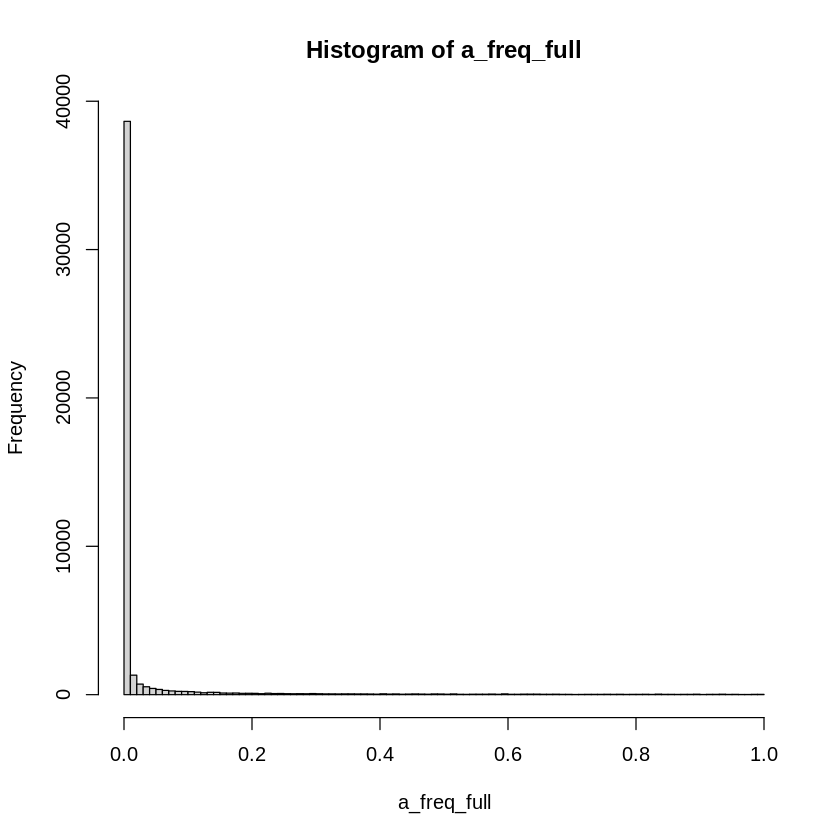

In [19]:
G_full <- matrix(NA, nrow = nrow(geno_full), ncol = ncol(geno_full))
G_full[geno_full %in% c("0/0", "0|0")] <- 0
G_full[geno_full  %in% c("0/1", "1/0", "1|0", "0|1")] <- 1
G_full[geno_full %in% c("1/1", "1|1")] <- 2



#head(G_full[,1:5])

a_freq_full <- rowSums(G_full)/(2*ncol(G_full))
hist(a_freq_full, breaks=seq(0,1,0.01))

if (!identical(sort(unique(unlist(as.numeric(G_full)))), as.numeric(0:2))){
print("Error: full genotype matrix not uniquely 012")
break
}


G_full_subset <- G_full[,which(indPhen_df$subset)]

In [ ]:
G_full_subset

In [ ]:
## outflank 

In [27]:
class(G_full_subset)

ERROR: Error in eval(expr, envir, enclos): object 'G_full_subset' not found


In [29]:
# Step 1: Determine the number of loci
num_loci <- nrow(G_full)

# Step 2: Create a list of locus names from 1 to num_loci
locus_names <- as.character(1:num_loci)

In [31]:
# Step 1: Determine the number of loci
num_pops <- ncol(G_full)

# Step 2: Create a list of locus names from 1 to num_loci
pop_names <- as.character(1:num_pops)

In [1]:
pop_names

ERROR: Error in eval(expr, envir, enclos): object 'pop_names' not found


In [ ]:
# FST Outflank ####
fst <- MakeDiploidFSTMat(t(G_full), locusNames = locus_names, popNames = pop_names)
# , locusNames = muts_full$mutname,  popNames = subset_indPhen_df$subpopID
head(fst)

In [ ]:

if(!identical(as.character(fst$locusNames), as.character(rownames(muts_full$mutname)))){print("Error 1h: mutations not lined up");break()}

if(!identical(as.character(muts_full$mutname), as.character(rownames(G_full_subset)))){print("Error 1g: mutations not lined up");break()}


muts_full$He_outflank <- fst$He
muts_full$Fst_outflank <- fst$FST
meanFst <- mean(fst$T1)/mean(fst$T2)

# FST manhattan ###

pdf(paste0(path,seed,"_pdf_8manhattan_fst.pdf"), width=15, height=5)